In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("preprocessed.csv")

In [207]:
from sklearn.ensemble import RandomForestRegressor

In [208]:
params = {
    'bootstrap': True,
 'max_features': 0.7,
 'min_samples_split': 4,
 'n_estimators': 500}

In [211]:
X_train, X_test, y_train, y_test = train_test_split(df[["amd", "intel"]], df["radius"],test_size=0.25,
                                                   random_state=101)

In [212]:
rf = RandomForestRegressor(**params, random_state=101, n_jobs=-1)

In [213]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [214]:
pred_y_rf = rf.predict(df[["amd", "intel"]])

In [216]:
df["alpa_rf"] = pred_y_rf

In [217]:
df.head()

,Unnamed: 0,id,amd,intel,radius,cos_sin_sqrt,ydl,pred,radius_pred,alpa_rf
0,0,5571,259,284,0.25,1.118267,False,False,0.131432,0.288113
1,1,4339,205,169,0.26,-0.206701,False,False,0.262950,0.282359
2,2,4397,208,430,0.10,NaN,False,False,0.199063,0.164414
3,3,4088,195,504,0.16,0.146093,False,True,0.786721,0.274050
4,4,1612,99,417,0.17,NaN,False,False,0.216804,0.185177


In [242]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["radius","pred","id","Unnamed: 0", "cos_sin_sqrt"], axis=1), df["radius"], random_state=101, train_size=0.999) 

/Users/dosya/Envs/ds/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [243]:
from keras.layers import Dense, Dropout
from keras.models import Sequential, Model, K, load_model

In [247]:
model = Sequential()
model.add(Dense(5, input_shape=(5,), activation="relu"))
model.add(Dense(20, activation="sigmoid"))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(1, activation="relu"))

In [248]:
model.compile(loss="mse", optimizer='adam', metrics=["mse"])

In [249]:
batch_size = 64
epochs = 300
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3, shuffle=True)

Train on 3367 samples, validate on 1444 samples
Epoch 1/300
3367/3367 [==============================] - 1s 325us/step - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 2/300
3367/3367 [==============================] - 0s 46us/step - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 3/300
3367/3367 [==============================] - 0s 56us/step - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 4/300
3367/3367 [==============================] - 0s 48us/step - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5/300
3367/3367 [==============================] - 0s 52us/step - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 6/300
3367/3367 [==============================] - 0s 44us/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_l

Epoch 50/300
3367/3367 [==============================] - 0s 61us/step - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 51/300
3367/3367 [==============================] - 0s 75us/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 52/300
3367/3367 [==============================] - 0s 60us/step - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 53/300
3367/3367 [==============================] - 0s 51us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 54/300
3367/3367 [==============================] - 0s 58us/step - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 55/300
3367/3367 [==============================] - 0s 65us/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0160 - val_mean_squared_error: 0.016

3367/3367 [==============================] - 0s 44us/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 100/300
3367/3367 [==============================] - 0s 52us/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 101/300
3367/3367 [==============================] - 0s 54us/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 102/300
3367/3367 [==============================] - 0s 52us/step - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 103/300
3367/3367 [==============================] - 0s 53us/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 104/300
3367/3367 [==============================] - 0s 52us/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 

Epoch 148/300
3367/3367 [==============================] - 0s 72us/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 149/300
3367/3367 [==============================] - 0s 71us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 150/300
3367/3367 [==============================] - 0s 72us/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 151/300
3367/3367 [==============================] - 0s 67us/step - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 152/300
3367/3367 [==============================] - 0s 57us/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 153/300
3367/3367 [==============================] - 0s 64us/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0107 - val_mean_squared_error:

Epoch 197/300
3367/3367 [==============================] - 0s 52us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 198/300
3367/3367 [==============================] - 0s 61us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 199/300
3367/3367 [==============================] - 0s 54us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 200/300
3367/3367 [==============================] - 0s 54us/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 201/300
3367/3367 [==============================] - 0s 64us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 202/300
3367/3367 [==============================] - 0s 54us/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0107 - val_mean_squared_error:

Epoch 246/300
3367/3367 [==============================] - 0s 58us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 247/300
3367/3367 [==============================] - 0s 64us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 248/300
3367/3367 [==============================] - 0s 59us/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 249/300
3367/3367 [==============================] - 0s 60us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 250/300
3367/3367 [==============================] - 0s 54us/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 251/300
3367/3367 [==============================] - 0s 54us/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0109 - val_mean_squared_error:

Epoch 295/300
3367/3367 [==============================] - 0s 59us/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 296/300
3367/3367 [==============================] - 0s 67us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 297/300
3367/3367 [==============================] - 0s 66us/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 298/300
3367/3367 [==============================] - 0s 56us/step - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 299/300
3367/3367 [==============================] - 0s 60us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 300/300
3367/3367 [==============================] - 0s 57us/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0109 - val_mean_squared_error:

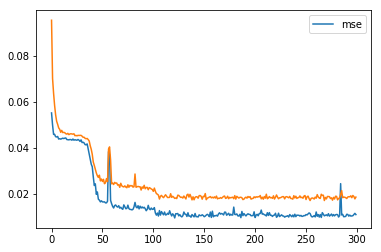

In [250]:
plt.plot(history.history["val_mean_squared_error"])
plt.legend(["val_mse"])
plt.plot(history.history["mean_squared_error"])
plt.legend(["mse"])

In [251]:
y_pred = model.predict(X_test)

In [252]:
from sklearn.metrics import mean_squared_error

In [253]:
mean_squared_error(y_test, y_pred) ** 0.5

0.09704718944206862

In [168]:
from mpl_toolkits.mplot3d import Axes3D

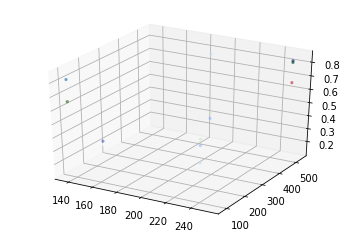

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test.amd, X_test.intel, y_pred, c=y_test, cmap="coolwarm", marker=".", alpha=0.4)
ax.scatter(X_test.amd, X_test.intel, y_test, c=y_test, cmap="Greens", marker=".", alpha=0.5)
ax.scatter(X_test.amd, X_test.intel, X_test.radius_pred, c=y_test, cmap="Blues", marker=".", alpha=0.5)
plt.show()

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0.27210742, 0.31207867, 0.35204991, 0.39202116, 0.4319924 ,
        0.47196364, 0.51193489, 0.55190613, 0.59187738, 0.63184862,
        0.67181987]),
 <a list of 10 Patch objects>)

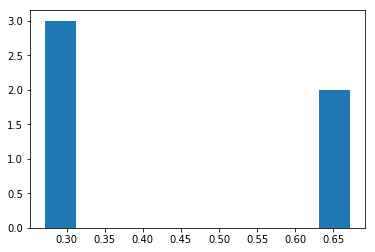

In [170]:
plt.hist(y_pred)

In [226]:
df_test = pd.read_csv("preprocessed_test.csv")

In [227]:
df_test.head()

,id,amd,intel,pred,ydl,radius
0,4365,206,405,False,0,0.194466
1,1129,80,320,True,1,0.797716
2,2602,136,228,False,0,0.140707
3,1747,105,531,True,1,0.749952
4,3286,161,475,False,0,0.264766


In [229]:
y_pred_test = model.predict(df_test.drop(["pred","id"], axis=1))

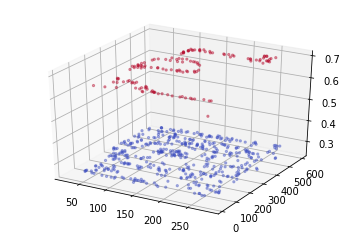

In [231]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_test.amd, df_test.intel, y_pred_test, c=df_test.ydl, cmap="coolwarm", marker=".", alpha=0.4)
plt.show()

In [234]:
y_pred_test.min()

0.26115564

In [239]:
save_df = df_test.copy()

In [240]:
save_df.drop(["amd", "intel", "radius", "pred", "ydl"], axis=1, inplace=True)

In [241]:
save_df["radius"] = y_pred_test

In [242]:
save_df

,id,radius
0,4365,0.274209
1,1129,0.677948
2,2602,0.273031
3,1747,0.671843
4,3286,0.274760
5,787,0.268810
6,2834,0.273359
7,84,0.267224
8,2995,0.274136
9,1557,0.272117


In [243]:
save_df.to_csv("output_keras.csv", index=False)

In [244]:
df_output_sl = pd.read_csv("output_1.csv")

In [246]:
df_output_sl.drop(["pred", "ydl", "amd", "intel"], axis=1, inplace=True)

In [251]:
save_df['second_radius'] = df_output_sl.radius

In [253]:
save_df['avg'] = save_df[['radius', 'second_radius']].mean(axis=1)

In [256]:
new_save_df = save_df[["id", "avg"]].copy()

In [259]:
new_save_df.columns = ["id", "radius"]

In [260]:
new_save_df.to_csv("output_keras_2.csv", index=False)

In [261]:
new_save_df

,id,radius
0,4365,0.230565
1,1129,0.771763
2,2602,0.245410
3,1747,0.746971
4,3286,0.230959
5,787,0.269404
6,2834,0.265538
7,84,0.264811
8,2995,0.235902
9,1557,0.254786


In [263]:
old_model = load_model("model.h5")

In [264]:
old_save_df = df_test.copy()

In [266]:
y_pred_test = old_model.predict(old_save_df.drop(["pred","id","radius"], axis=1))

In [267]:
y_pred_test

array([[0.27932116],
       [0.66098905],
       [0.27932116],
       [0.64326304],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.6732489 ],
       [0.27932116],
       [0.27932116],
       [0.6724347 ],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.27932116],
       [0.6739787 ],
       [0.7163403 ],
       [0.3208171 ],
       [0.6615989 ],
       [0.27932116],
       [0.6559211 ],
       [0.27932116],
       [0.27932116],
       [0.67380726],
       [0.27932116],
       [0.2805348 ],
       [0.27932116],
       [0.68498397],
       [0.658911  ],
       [0.27932116],
       [0.6719506 ],
       [0.67007387],
       [0.27932116],
       [0.279

In [269]:
old_save_df.drop(["amd", "intel", "radius", "pred", "ydl"], axis=1, inplace=True)

In [271]:
old_save_df["radius"] = y_pred_test

In [272]:
old_save_df

,id,radius
0,4365,0.279321
1,1129,0.660989
2,2602,0.279321
3,1747,0.643263
4,3286,0.279321
5,787,0.279321
6,2834,0.279321
7,84,0.279321
8,2995,0.279321
9,1557,0.279321


In [273]:
mean_squared_error(new_save_df.radius, old_save_df.radius)

0.0031845251152276596

In [274]:
old_save_df.to_csv("output_keras_3.csv", index=False)

In [275]:
old_save_df['second_radius'] = new_save_df.radius

In [276]:
old_save_df['avg'] = old_save_df[['radius', 'second_radius']].mean(axis=1)

In [277]:
new_old_save_df = old_save_df[["id", "avg"]].copy()

In [278]:
new_old_save_df.columns = ["id", "radius"]

In [279]:
new_old_save_df

,id,radius
0,4365,0.254943
1,1129,0.716376
2,2602,0.262365
3,1747,0.695117
4,3286,0.255140
5,787,0.274363
6,2834,0.272429
7,84,0.272066
8,2995,0.257611
9,1557,0.267053


In [280]:
new_old_save_df.to_csv("output_keras_4.csv", index=False)

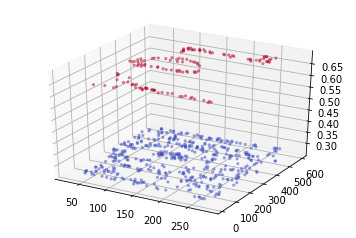

In [171]:
df_test = pd.read_csv("preprocessed_test.csv")
y_pred_test = model.predict(df_test.drop(["pred","id"], axis=1))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_test.amd, df_test.intel, y_pred_test, c=df_test.ydl, cmap="coolwarm", marker=".", alpha=0.4)
plt.show()

In [172]:
save_df = df_test.copy()
save_df.drop(["amd", "intel", "radius", "pred", "ydl"], axis=1, inplace=True)
save_df["radius"] = y_pred_test
save_df.to_csv("output_keras10.csv", index=False)

In [173]:
df_output_sl = pd.read_csv("output_keras8.csv")

In [174]:
save_df['second_radius'] = df_output_sl.radius

In [175]:
save_df['avg'] = save_df[['radius', 'second_radius']].mean(axis=1)

In [176]:
new_save_df = save_df[["id", "avg"]].copy()

In [177]:
new_save_df.columns = ["id", "radius"]

In [178]:
new_save_df

,id,radius
0,4365,0.272551
1,1129,0.659159
2,2602,0.273643
3,1747,0.656909
4,3286,0.272522
5,787,0.273962
6,2834,0.272610
7,84,0.273082
8,2995,0.273038
9,1557,0.273122


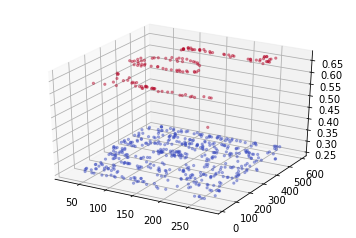

In [179]:
df_test = pd.read_csv("preprocessed_test.csv")
y_pred_test = model.predict(df_test.drop(["pred","id"], axis=1))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_test.amd, df_test.intel, new_save_df.radius, c=df_test.ydl, cmap="coolwarm", marker=".", alpha=0.4)
plt.show()

In [180]:
new_save_df.to_csv("output_keras11.csv", index=False)

In [181]:
df_output_1 = pd.read_csv("output_keras8.csv")
df_output_2 = pd.read_csv("output_keras9.csv")
df_output_3 = pd.read_csv("output_keras6.csv")

In [189]:
X_test.shape

(5, 4)

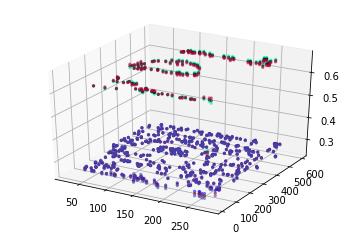

In [195]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_test.amd, df_test.intel, df_output_1.radius, c=df_test.ydl, cmap="coolwarm", marker=".", alpha=0.5)
ax.scatter(df_test.amd, df_test.intel, df_output_2.radius, c=df_test.ydl, cmap="seismic_r", marker=".", alpha=0.5)
ax.scatter(df_test.amd, df_test.intel, df_output_3.radius, c=df_test.ydl, cmap="winter", marker=".", alpha=0.5)
plt.show()

In [261]:
df_output_1['second_radius'] = df_output_2.radius
df_output_1['third_radius'] = df_output_3.radius
df_output_1['fourth_radius'] = alpa_pd.radius

In [262]:
df_output_1['avg'] = df_output_1[['radius', 'second_radius', 'third_radius', "fourth_radius"]].mean(axis=1)

In [198]:
alpa_pd = pd.read_csv("Alpamys.csv")

In [203]:
output_pd = pd.read_csv("output_keras.csv")

In [200]:
print(mean_squared_error(alpa_pd.radius, df_output_1.radius) ** 0.5)

0.07928676107354615


In [202]:
print(np.linalg.norm(alpa_pd.radius-df_output_1.radius))

1.946970328578419


In [204]:
print(mean_squared_error(alpa_pd.radius, output_pd.radius) ** 0.5)

0.08399422459039836


In [205]:
print(np.linalg.norm(alpa_pd.radius-output_pd.radius))

2.062567077216883


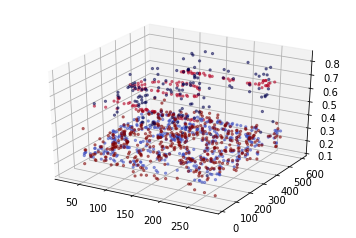

In [206]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_test.amd, df_test.intel, df_output_1.radius, c=df_test.ydl, cmap="coolwarm", marker=".", alpha=0.5)
ax.scatter(df_test.amd, df_test.intel, alpa_pd.radius, c=df_test.ydl, cmap="seismic_r", marker=".", alpha=0.5)
plt.show()

In [230]:
df_test_alpa_rf = pd.read_csv("preprocessed_test.csv") 

In [231]:
df_test_alpa_rf.head()

,id,amd,intel,pred,ydl,radius
0,4365,206,405,False,0,0.194466
1,1129,80,320,True,1,0.797716
2,2602,136,228,False,0,0.140707
3,1747,105,531,True,1,0.749952
4,3286,161,475,False,0,0.264766


In [232]:
pred_test_alpa_rf = rf.predict(df_test_alpa_rf[["amd", "intel"]])

In [233]:
df_test_alpa_rf["pred_alpa"] = pred_test_alpa_rf

In [234]:
df_test_alpa_rf.head()

,id,amd,intel,pred,ydl,radius,pred_alpa
0,4365,206,405,False,0,0.194466,0.282556
1,1129,80,320,True,1,0.797716,0.699628
2,2602,136,228,False,0,0.140707,0.237346
3,1747,105,531,True,1,0.749952,0.630991
4,3286,161,475,False,0,0.264766,0.306325


In [254]:
y_pred_keras_alpa = model.predict(df_test_alpa_rf[["amd", "intel", "ydl", "radius", "pred_alpa"]])

In [264]:
df5 = pd.DataFrame()

In [265]:
df5["id"] = df_output_1.id

In [266]:
df5["radius"] = df_output_1.avg

In [267]:
df5

,id,radius
0,4365,0.253157
1,1129,0.654927
2,2602,0.269298
3,1747,0.648021
4,3286,0.288229
5,787,0.257571
6,2834,0.285463
7,84,0.265176
8,2995,0.257324
9,1557,0.243091


In [268]:
df5.to_csv("Mean.csv", index=False)

In [263]:
df_output_1

,id,radius,second_radius,third_radius,fourth_radius,avg
0,4365,0.272994,0.274180,0.275365,0.19009,0.253157
1,1129,0.646091,0.646770,0.647449,0.67940,0.654927
2,2602,0.275178,0.274977,0.274776,0.25226,0.269298
3,1747,0.643974,0.644587,0.645201,0.65832,0.648021
4,3286,0.272936,0.274289,0.275641,0.33005,0.288229
5,787,0.275817,0.274241,0.272666,0.20756,0.257571
6,2834,0.273113,0.274027,0.274940,0.31977,0.285463
7,84,0.274058,0.272965,0.271873,0.24181,0.265176
8,2995,0.273969,0.274649,0.275329,0.20535,0.257324
9,1557,0.274136,0.274228,0.274319,0.14968,0.243091
